In [499]:
from xlrd import open_workbook # work with excel
import matplotlib.pyplot as plt # for the visulations

In [500]:
years = [2012, 2013, 2014, 2015, 2016]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'g^', 'b^', 'ro']

In [501]:
wb = open_workbook('SIPRI-Milex-data-1949-2016.xlsx') # open excel data for 
gdp_per_capita_wb = open_workbook('API_NY.GDP.PCAP.CD_DS2_en_excel_v2.xls') # data for per_capita_information # retrieved from https://data.worldbank.org/indicator/NY.GDP.PCAP.CD

In [502]:
sheet_mil_spending_usd = wb.sheet_by_name('Constant (2015) USD') # select first sheet with totals for money used
gdp_per_capita_sheet = gdp_per_capita_wb.sheet_by_name('Data')

In [503]:
# retrieve all the interesting data from the spreadsheet for ALL Countries
values = {} # values for spending for every country
for row in range(7, sheet_mil_spending_usd.nrows): # iterate through every country
    country = sheet_mil_spending_usd.row(row) 
    if isinstance(country[70].value, float): # this will skip countries that have .. instead of an number, not major issue
        twelve = country[66].value if isinstance(country[66].value, float) else 0 # 2012 states, if they exist
        thirteen = country[67].value if isinstance(country[67].value, float) else 0 # 2013 states, if they exist
        fourteen = country[68].value if isinstance(country[68].value, float) else 0 # 2014 states, if they exist
        fifteen = country[69].value if isinstance(country[69].value, float) else 0 # 2015  states, if they exist
        sixteen = country[70].value if isinstance(country[70].value, float) else 0 # 2016 states, if they exist
        values[country[0].value] = {'12': twelve,
                                    '13': thirteen,
                                    '14': fourteen,
                                    '15': fifteen,
                                    '16': sixteen, 
                                    'sum': twelve + thirteen + fourteen + fifteen + sixteen}

In [504]:
# find the top ten countries based on the SUM of the military spending over the last five years (2012-2016)
top_ten = [] # top ten countries
for key in values: # iterate through every country 
    if len(top_ten) < 10: # if we have not gotten 10 countries just add it 
        top_ten.append((key, values[key]['sum']))
    else:
        top_ten.sort(key=lambda x: x[1]) # sorts list from smallest spent to largest spent
        if top_ten[0][1] < values[key]['sum']: # remove the smallest number if the next row is larger
            top_ten.remove(top_ten[0])
            top_ten.append((key, values[key]['sum']))
top_ten.reverse() # resorts the list from largest to smallest        

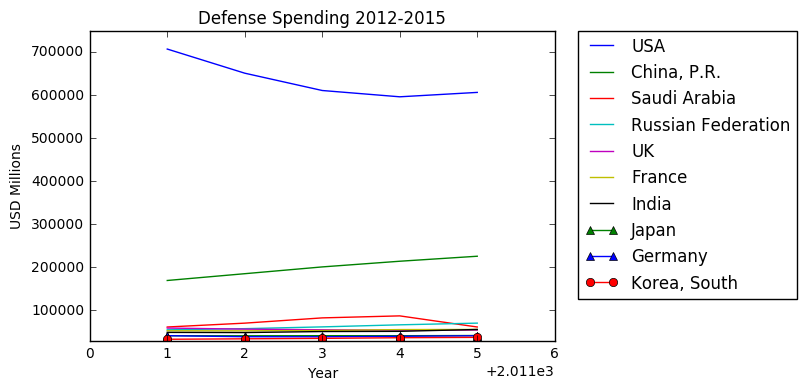

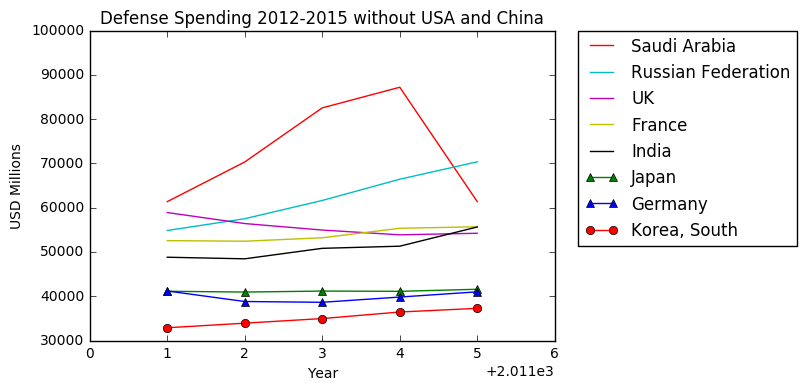

In [569]:
# top ten countries total defense spending over the last 5 years

count = 0 # count is used to iterate through the color list - allowing to add different lines for each country 
plt.title('Defense Spending 2012-2015') # graph title
for x in top_ten: # plot the top ten    
    plt.plot( years, [values[x[0]]['12'], values[x[0]]['13'], values[x[0]]['14'],values[x[0]]['15'], values[x[0]]['16']],colors[count],label = x[0], linestyle='-')
    count += 1
plt.axis([2011, 2017, 30000, 750000]) # set the x and y axis 
plt.ylabel('USD Millions') # label y axis
plt.xlabel('Year') # label x axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # add legend

plt.show()

# USA and China are so much bigger than 3-10 that the graph is not that interesting. This sub plot removes them and resizes graph

count = 0
for x in top_ten:
    if count == 0 or count == 1: # skip the number 1 and 2 counties
        count += 1    
        continue
    plt.plot( years, [values[x[0]]['12'], values[x[0]]['13'], values[x[0]]['14'],values[x[0]]['15'], values[x[0]]['16']],colors[count],label = x[0], linestyle='-')
    count += 1
plt.axis([2011, 2017, 30000, 100000])
plt.title('Defense Spending 2012-2015 without USA and China')
plt.ylabel('USD Millions')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


In [574]:
share_gdp_sheet = wb.sheet_by_name('Share of GDP') # spreadsheet with info on defense spending as a pert of GDP

In [586]:
top_ten_gdp = [] # where we store the data
for country in range(len(top_ten)): # iterate through the top ten
    name = top_ten[country][0] # for cleanliness
    top_ten_gdp.append((name, 0)) # add it to the list
    for row in range(share_gdp_sheet.nrows): # look for country in the spreadsheet
        if share_gdp_sheet.row(row)[0].value == name:
            average_gdp = (share_gdp_sheet.row(row)[65].value + share_gdp_sheet.row(row)[66].value + share_gdp_sheet.row(row)[67].value + share_gdp_sheet.row(row)[68].value + share_gdp_sheet.row(row)[69].value ) / 5   
            top_ten_gdp[country] = (name, {'12': share_gdp_sheet.row(row)[65].value * 100,
                                         '13': share_gdp_sheet.row(row)[66].value * 100,
                                         '14': share_gdp_sheet.row(row)[67].value* 100,
                                         '15': share_gdp_sheet.row(row)[68].value * 100,
                                         '16': share_gdp_sheet.row(row)[69].value * 100,
                                         'average': average_gdp * 100}) # average gdp over the five years


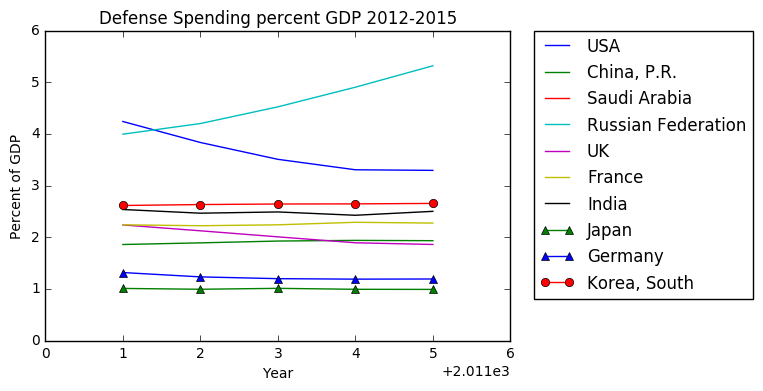

In [596]:
# plot it
count = 0
plt.title('Defense Spending percent GDP 2012-2015')
for x in top_ten_gdp:    
    plt.plot( years, [x[1]['12'], x[1]['13'], x[1]['14'], x[1]['15'], x[1]['16']],colors[count],label = x[0], linestyle='-')
    count += 1
plt.axis([2011, 2017, 0, 15])
plt.ylabel('Percent of GDP')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


In [507]:
spending_per_capita_sheet = wb.sheet_by_name('Per capita')

In [624]:
top_ten_per_capita = []
gdp_per_capita = []
for c in top_ten:
    if c[0] == "Russian Federation":
        name = 'USSR/Russia'
    else:
        name = c[0]
    for row in range(spending_per_capita_sheet.nrows):
        if spending_per_capita_sheet.row(row)[0].value == name:
            print c
            avg_capita = spending_per_capita_sheet.row(row)[26].value + spending_per_capita_sheet.row(row)[27].value + spending_per_capita_sheet.row(row)[28].value + spending_per_capita_sheet.row(row)[29].value + spending_per_capita_sheet.row(row)[30].value   
            top_ten_per_capita.append((c[0], {'12': spending_per_capita_sheet.row(row)[26].value,
                                              '13': spending_per_capita_sheet.row(row)[27].value,
                                              '14': spending_per_capita_sheet.row(row)[28].value,
                                              '15': spending_per_capita_sheet.row(row)[29].value,
                                              '16': spending_per_capita_sheet.row(row)[30].value,
                                              'average':  avg_capita}))
top_ten_per_capita

(u'USA', 3170648.3633036735)
(u'China, P.R.', 995254.5572285376)
(u'Saudi Arabia', 362735.8886684909)
(u'Russian Federation', 310718.3260747314)
(u'UK', 278322.0489754412)
(u'France', 269188.2251763644)
(u'India', 254987.57796580563)
(u'Japan', 205885.00450914158)
(u'Germany', 199408.18669694697)
(u'Korea, South', 175439.7214440548)


[(u'USA',
  {'12': 2175.289592693558,
   '13': 2017.1288134662539,
   '14': 1909.2709596623286,
   '15': 1852.263770489012,
   '16': 1886.1639356740134,
   'average': 9840.117071985165}),
 (u'China, P.R.',
  {'12': 116.12209857381232,
   '13': 132.02096788164553,
   '14': 146.609445217667,
   '15': 155.58535983429033,
   '16': 155.74403715143663,
   'average': 706.0819086588518}),
 (u'Saudi Arabia',
  {'12': 1915.4385896749711,
   '13': 2219.128069417187,
   '14': 2614.8084869965223,
   '15': 2764.262471814431,
   '16': 1978.1891787091831,
   'average': 11491.826796612295}),
 (u'Russian Federation',
  {'12': 568.5728305863091,
   '13': 616.2693389393322,
   '14': 590.5099232490026,
   '15': 462.9871400414229,
   '16': 483.1143883476669,
   'average': 2721.453621163734}),
 (u'UK',
  {'12': 920.1225662892306,
   '13': 889.0810433786185,
   '14': 919.9691968875976,
   '15': 832.2878983248733,
   '16': 741.3119393181773,
   'average': 4302.772644198498}),
 (u'France',
  {'12': 944.51629280

In [509]:
# this might not be helpful anymore now that we are doing the graphs
top_ten_growth = []
for t in top_ten:
    top_ten_growth.append((t[0], values[t[0]]['15'] - values[t[0]]['12']))
top_ten_growth.sort(key=lambda x: x[1], reverse=True)

In [519]:
# this code block is here because the country names on both sheets are not the same
top_ten_growth_per_capita_gdp = [] # list where we store the data for the top ten GDP growth per capita
for c in top_ten:
    if c[0] == 'China, P.R.': # this is how spreadsheet 1 stores China
        top_ten_growth_per_capita_gdp.append((c[0][0:5], 0)) # change string to China
    elif c[0] == 'USA':  # this is how spreadsheet 1 stores USA
        top_ten_growth_per_capita_gdp.append(('United States', 0)) # change string to United States
    elif c[0] == 'Korea, South':  # this is how spreadsheet 1 stores South Korea
        top_ten_growth_per_capita_gdp.append(('Korea, Rep.', 0)) # change string to Korea, Rep.
    elif c[0] == 'UK':  # this is how spreadsheet 1 stores Britain
        top_ten_growth_per_capita_gdp.append(('United Kingdom', 0))  # change string to United Kingdom
    else:
        top_ten_growth_per_capita_gdp.append((c[0], 0)) # else its the same

In [597]:
for country in range(len(top_ten_growth_per_capita_gdp)): # find each of the top ten countries in the spread sheet
    name = top_ten_growth_per_capita_gdp[country][0] # storing this for clarity
    for row in range(gdp_per_capita_sheet.nrows): # iterate through every row of the spreadshet
        if gdp_per_capita_sheet.row(row)[0].value == name: #  if the current row is equal to the current country we are looking for add it
            top_ten_growth_per_capita_gdp[country] = (name, {'12': gdp_per_capita_sheet.row(row)[56].value,
                                                             '13': gdp_per_capita_sheet.row(row)[57].value,
                                                             '14': gdp_per_capita_sheet.row(row)[58].value,
                                                             '15': gdp_per_capita_sheet.row(row)[59].value,
                                                             '16': gdp_per_capita_sheet.row(row)[60].value})
            

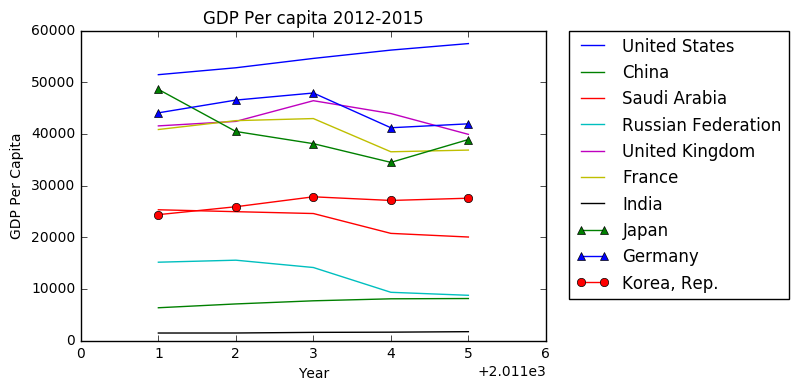

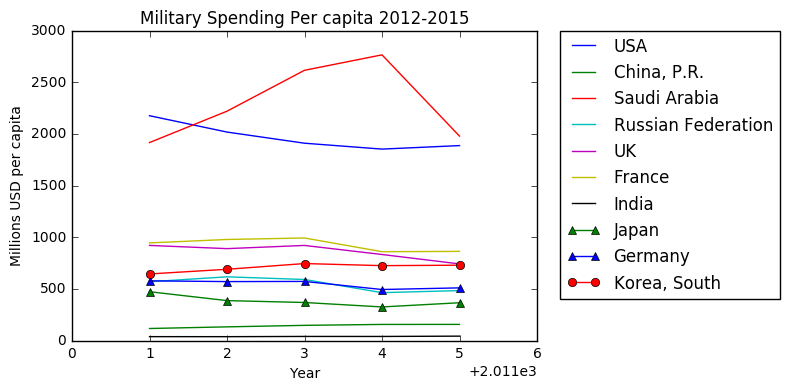

In [626]:
# GDP per capita 
for x in range(len(top_ten_growth_per_capita_gdp)): # plot each line
    plt.plot(years, [top_ten_growth_per_capita_gdp[x][1]['12'], top_ten_growth_per_capita_gdp[x][1]['13'], top_ten_growth_per_capita_gdp[x][1]['14'], top_ten_growth_per_capita_gdp[x][1]['15'], top_ten_growth_per_capita_gdp[x][1]['16']], colors[x],label = top_ten_growth_per_capita_gdp[x][0], linestyle='-' )
plt.axis([2011, 2017, 0, 60000]) # set the x and y axis
plt.ylabel('GDP Per Capita') # label y axis
plt.xlabel('Year') # label x axis
plt.title('GDP Per capita 2012-2015') # overall title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # add a legend

plt.show() # plot it 

# Military Spending per capita
count = 0
for x in top_ten_per_capita: # plot each line
    plt.plot(years, [x[1]['12'], x[1]['13'], x[1]['14'], x[1]['15'], x[1]['16']], colors[count],label = x[0], linestyle='-' )
    count +=1
plt.axis([2011, 2017, 0, 3000]) # set the x and y axis
plt.ylabel('Millions USD per capita') # label y axis
plt.xlabel('Year') # label x axis
plt.title('Military Spending Per capita 2012-2015') # overall title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # add a legend

plt.show() # plot it     